## Python statistics essential training - 04_05_pvaluesandconfidence

In [1]:
#meta 4/19/2020
#Ch4. Statistical Inference
#my code and solution code bits

In [2]:
import math
import io

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

#to fix matplotlib error axvline -> 'float' object is not callable
from importlib import reload 
reload(plt)

<module 'matplotlib.pyplot' from '/Users/Amigo/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [4]:
import scipy.stats
import scipy.optimize
import scipy.spatial

# Statistical Inference

# p-value and Confidence Intervals

There is in fact a close relationship between hypothesis testing and confidence intervals. If the null hypothesis corresponds to a range of values for a population parameter that are excluded from the confidence interval, then the null hypothesis must be rejected with a very low P value. The lower p-value, the higher the confidence level of he interval.

## 0. Load Data
We go back to our example of the election poll and reformulate it as hypothesis testing.


In [5]:
poll = pd.read_csv('lynda_data/poll.csv')
largepoll = pd.read_csv('lynda_data/poll-larger.csv')

## 1. Analysis
To remind, in the smaller poll Brown had a seeming majority of votes.  

In [6]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

So here the null hypothesis will be that Green wins or ties the election, so the true Brown fraction would be 0.50 or less.

Ho = Brown doesn't win (aka Green wins or ties)    
Ha = Brown wins (aka Green doesn't win or ties)    

We need to find out whether a Brown proportion of 0.511 is an extreme result if the null hypothesis holds. So we compute the sampling distribution of the proportion, and get a true Brown fraction of 0.50. If it's lower than that the p-value will be even lower. So we can work with 0.50. 

Here's a function to simulate the sample of a thousand (same as 04_02)


In [7]:
#build a function that simulates a voting sample given the true vote fraction
#input: 
#  -the actual fraction of votes for candidate A
#  -the number of people polled
#output:
#  -votes for either A or B

# use numpy random rand and compare uniformly distributed numbers between zero and one with the vote fraction for candidate A. 
# use numpy where and return A if the condition holds true or B otherwise. 
# enclose everything in a data frame.

def sample(vote_fraction, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < vote_fraction, 'A', 'B')})

In [8]:
# A = Brown, B = Green
sample(0.50).tail() #default 1000 votes
sample(0.50, 100).tail() #only 100 votes

,vote
95,B
96,B
97,A
98,A
99,B


And here's the sampling distribution.


In [9]:
# call sample, grab the votes and count them, repeat 10000 times
# collect the results in a list comprehension and then close in the data frame
dist = pd.DataFrame({'Brown': [sample(0.50).vote.value_counts(normalize=True)['A'] for i in range(10000)]})

dist.head()

,Brown
0,0.509
1,0.484
2,0.494
3,0.514
4,0.513


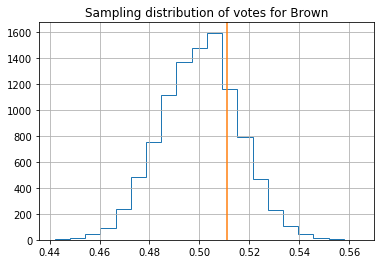

In [10]:
#histogram the sampling distribution
dist.Brown.hist(histtype='step',bins=20)
#overlay Brown's value of 0.511
plt.title("Sampling distribution of votes for Brown")
plt.axvline(0.511,c='C1')
plt.draw()  

We see that indeed 0.511 is not a very extreme value.

In [11]:
100 - scipy.stats.percentileofscore(dist,0.511)

25.17

If we look for its quantile we see that the corresponding P value is 24%, certainly not enough to reject the null hypothesis that Green ties or wins.

What about the larger sample?

In [12]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

Here, it makes sense to set the null hypothesis to Brown winning or tying since Green seems to have the majority. A nice feature of binary problems, such as this, is that the null hypothesis and its alternative are complementary.

Ho = Brown wins (or ties)  
Ha = Brown doesn't win (or ties) which means Green wins  

Again, compute a sampling distribution at the fraction of 0.50, this time for Green, when the sample's at 10,000.


In [13]:
# call sample, grab the votes and count them, repeat 10000 times
# takes longer, so we compute only 1,000 repetitions
dist = pd.DataFrame({'Green': [sample(0.50,10000).vote.value_counts(normalize=True)['A'] for i in range(1000)]})

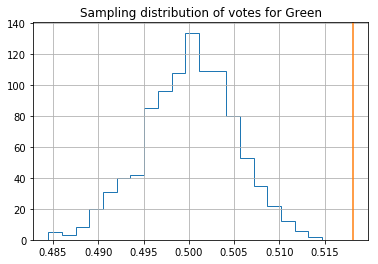

In [14]:
#histogram the sampling distribution
dist.Green.hist(histtype='step',bins=20)
#overlay Green's value of 0.5181
plt.title("Sampling distribution of votes for Green")
plt.axvline(0.5181,c='C1')
plt.draw() 

In [15]:
100 - scipy.stats.percentileofscore(dist,0.5181)

0.0

Here, the value's so extreme that it's not even included in our finite sampling distribution.

We conclude that the P value for rejecting the null hypothesis that Brown wins or ties is 1 / 1000 or less, which qualifies as very significant. 

Note:  
An interesting question is whether one can apply bootstrapping to compute the values. It is all trivial, because bootstrapping can only represent the true distribution, not the distribution under the null hypothesis, so we would need to modify the bootstrap values to be appropriate for the null case, which in some cases is straightforward and not as impossible.

Certainly, it requires some thinking and problem specific information. Doing so, is outside the scope of our course.